In [1]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('bank/bank-full.csv',delimiter=(';'))

In [3]:
# number of rows in dataset

print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))

Bank marketing dataset consists of 45211 rows.


In [4]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*20)

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
------------------------------------------------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
------------------------------------------------------------
housing
['yes' 'no']
-----------------------------------------------------

In [7]:
df[['job', 'y']].value_counts().reset_index(name='count')

,job,y,count
0,blue-collar,no,9024
1,management,no,8157
2,technician,no,6757
3,admin.,no,4540
4,services,no,3785
5,retired,no,1748
6,self-employed,no,1392
7,entrepreneur,no,1364
8,management,yes,1301
9,housemaid,no,1131


In [8]:
df.job.replace('unknown',df.job.mode()[0],inplace=True)
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

Comparing 'education' and 'y' column

In [9]:
df[['education', 'y']].value_counts().reset_index(name='count')

,education,y,count
0,secondary,no,20752
1,tertiary,no,11305
2,primary,no,6260
3,secondary,yes,2450
4,tertiary,yes,1996
5,unknown,no,1605
6,primary,yes,591
7,unknown,yes,252


In [10]:
df.education.replace('unknown',df.education.mode()[0],inplace=True)
df.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [11]:
df[['contact', 'y']].value_counts().reset_index(name='count')

,contact,y,count
0,cellular,no,24916
1,unknown,no,12490
2,cellular,yes,4369
3,telephone,no,2516
4,unknown,yes,530
5,telephone,yes,390


In [12]:
df.contact.replace('unknown',df.contact.mode()[0],inplace=True)
df.contact.unique()

array(['cellular', 'telephone'], dtype=object)

In [13]:
df[['poutcome', 'y']].value_counts().reset_index(name='count')

,poutcome,y,count
0,unknown,no,33573
1,failure,no,4283
2,unknown,yes,3386
3,other,no,1533
4,success,yes,978
5,failure,yes,618
6,success,no,533
7,other,yes,307


In [14]:
df.poutcome.replace('unknown','other',inplace=True)
df.poutcome.unique()

array(['other', 'failure', 'success'], dtype=object)

In [15]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

From the above we can see that there are no missing values

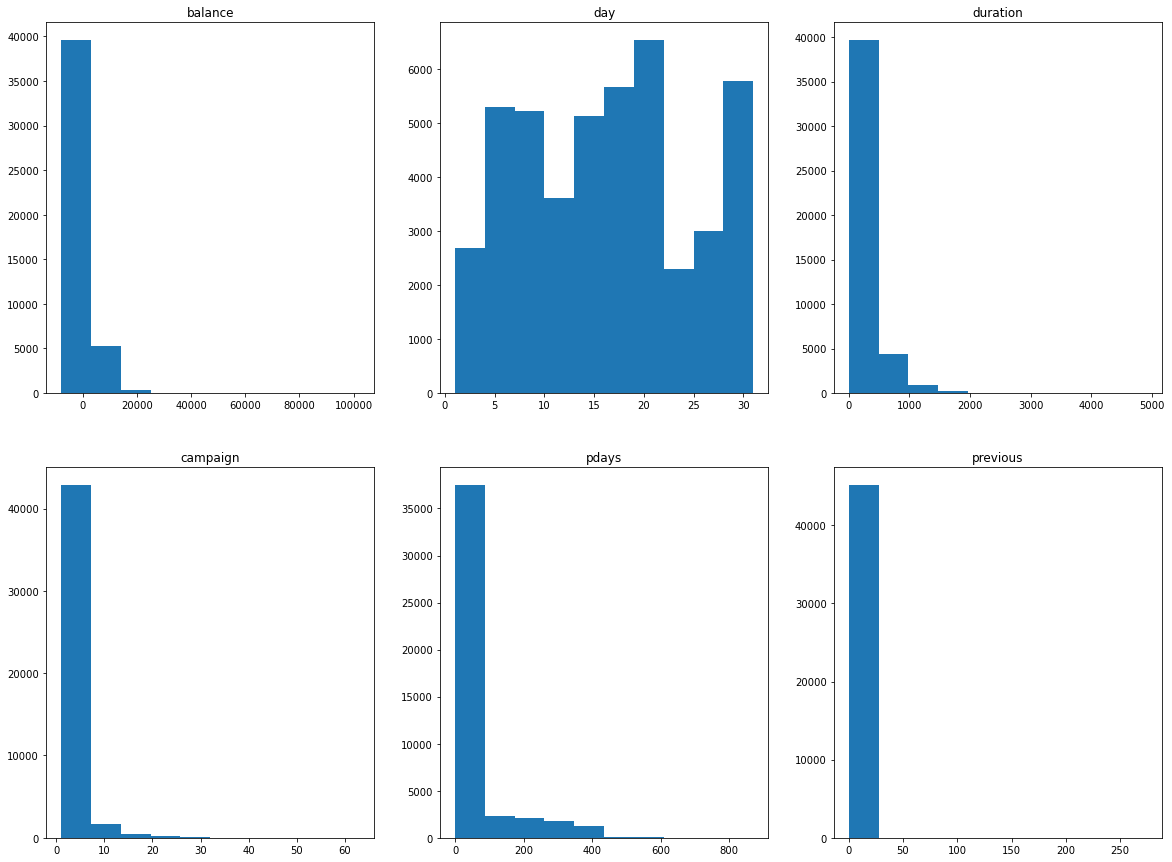

In [16]:
# For the numerical Data
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [17]:
df[['pdays', 'campaign', 'previous']].describe() 

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [18]:
#Percentage of 'pdays' values above 400:

len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724


'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign Looking closer into 'pdays' data we can see that: only 0.58% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values. -1 possibly means that the client wasn't contacted before or stands for missing data.

' To deal with the -1 we have to be sure about what to carry out on the data, do we go for the mean,\nmode or the median '

We will be applying the Boxplot and the Distribution plot for this

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

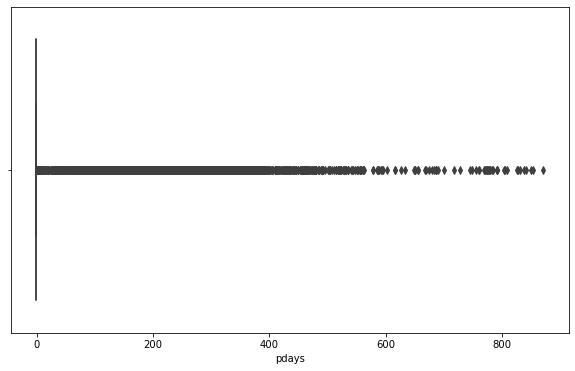

In [19]:
#Boxplot for deciding whether to use mean, mode or median for imputation
ax= plt.subplots (figsize=(10, 6))
sns.boxplot (df.pdays)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

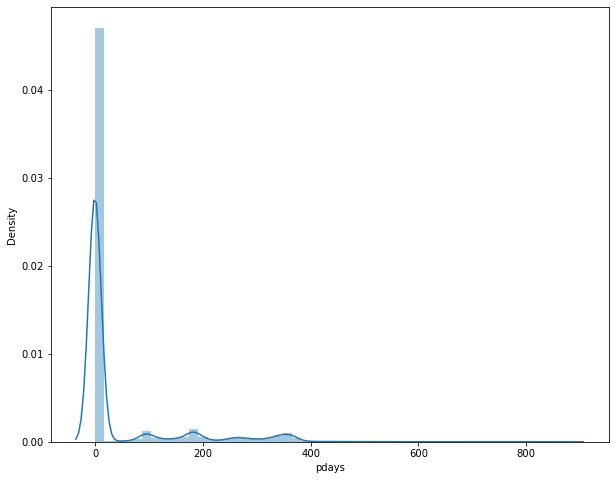

In [20]:
# Distribution plot for deciding imputation technique
ax = plt.subplots (figsize=(10, 8) )
sns.distplot(df.pdays)

In [21]:
df["pdays"].mode()

0   -1
dtype: int64

In [22]:
df["pdays"].median()

-1.0

In [23]:
df["pdays"].mean()

40.19782796222158

From the Box Plot we can see reasonable distribution

We would be replacing the '-1' with the mean of df['pdays']

In [24]:
df = df.replace(to_replace = -1, value = 40.19782796222158)

In [25]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261,1,40.197828,0,other,no
1,44,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151,1,40.197828,0,other,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76,1,40.197828,0,other,no
3,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92,1,40.197828,0,other,no
4,33,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,198,1,40.197828,0,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,40.197828,0,other,yes
45207,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,40.197828,0,other,yes
45208,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184.000000,3,success,yes
45209,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,40.197828,0,other,no


WE ARE GOING TO BE COMPARING OUR DEPOSIT'S COULUMN TO OTHER COLUMNS

<AxesSubplot:title={'center':'Yes Or No Responses'}>

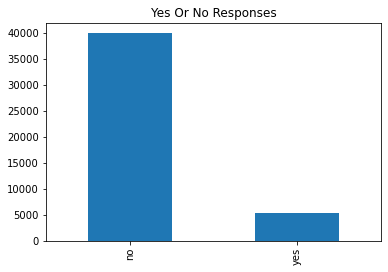

In [26]:
#The number of 'yes' and 'no' values in the response column 'y'.
value_counts = df['y'].value_counts()

value_counts.plot.bar(title = 'Yes Or No Responses')

<AxesSubplot:title={'center':'Job and deposit'}>

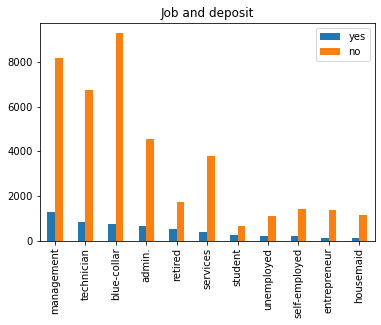

In [27]:
#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

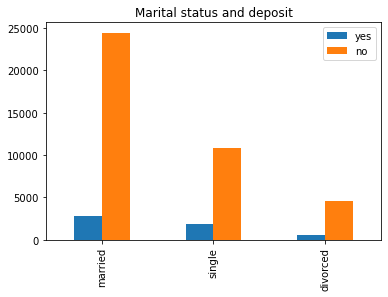

In [28]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

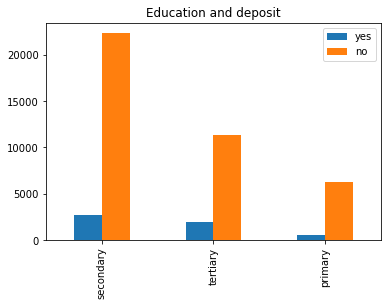

In [29]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
j_df['no'] = df[df['y'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

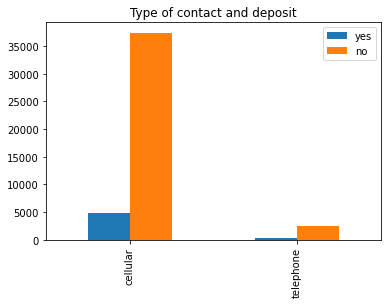

In [30]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

In [31]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['y'] == 'yes'][['y','balance']].describe())['balance']
b_df['balance_no'] = (df[df['y'] == 'no'][['y','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.299072,1303.762439
std,3501.088891,2974.174977
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and deposit statistics'}>

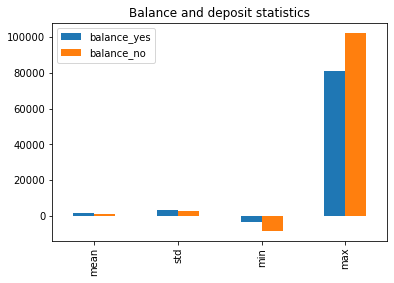

In [32]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [33]:
#age and deposit

a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

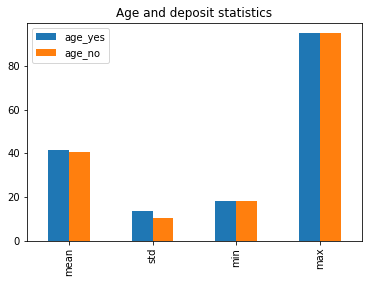

In [34]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [35]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

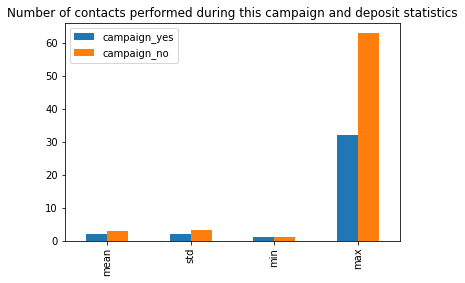

In [36]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

# FINAL RECOMMENDATION AND FINDINGS

From the diagrams we can tell that according to our dataset:

1. Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit.

2. Married customers are less likely to subscribe for term deposit.

3. Customers with 'cellular' type of contact are less likely to subscribe for term deposit.

4. People who subscribed for term deposit tend to have greater balance and age values.

5. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.